In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from mizani.formatters import comma_format
from plotnine import *
from plotnine.stats import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format
import statsmodels.api as sm
import statsmodels.formula.api as smf
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [40]:
vehicle = pd.read_csv("vehicles.csv")

In [79]:
f_150 = vehicle[vehicle["model"]=="f-150"]
f_150["age"] = 2021 - f_150["year"].astype(float)
f_150["odometer"] = f_150["odometer"].astype(float)
f_150 = f_150[(f_150["condition"].notna()) & (f_150["odometer"]<300000)\
              & (f_150["odometer"]>0)\
            & (f_150["age"]<40) & (f_150["age"]>0) & (f_150["price"]>1) &\
             (f_150["condition"].isin(["excellent","fair"]))]
f_150 = f_150[["age","odometer","price","condition"]]

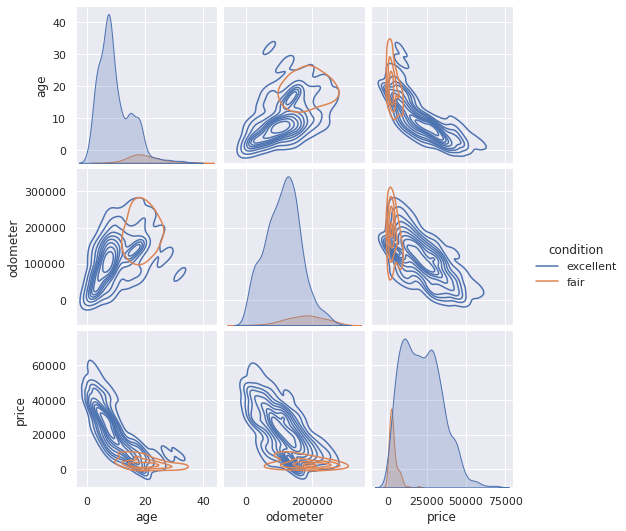

In [80]:
sns.set(rc={'figure.figsize':(30,30)})
sns.pairplot(f_150,hue="condition", kind="kde", plot_kws={'scatter_kws': {'alpha': 1}})

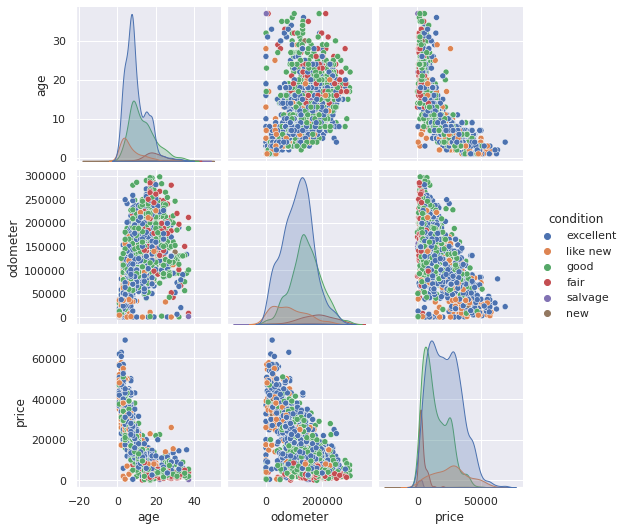

In [69]:
sns.set(rc={'figure.figsize':(30,30)})
sns.pairplot(f_150,hue="condition", kind="scatter")

In [81]:
from scipy import stats
stats.ttest_ind(f_150[f_150["condition"] == 'excellent']['price']\
                ,f_150[f_150["condition"] == 'fair']['price'])

Ttest_indResult(statistic=15.929288033574391, pvalue=2.5305191438247506e-53)

In [82]:
from scipy import stats
stats.ttest_ind(f_150[f_150["condition"] == 'excellent']['odometer']\
                ,f_150[f_150["condition"] == 'fair']['odometer'])

Ttest_indResult(statistic=-12.978899877655225, pvalue=8.769200016272438e-37)

In [83]:
from scipy import stats
stats.ttest_ind(f_150[f_150["condition"] == 'excellent']['age']\
                ,f_150[f_150["condition"] == 'fair']['age'])

Ttest_indResult(statistic=-19.804671331624732, pvalue=1.2022274811746099e-78)

In [100]:
ford = vehicle[(vehicle["manufacturer"]=="ford")]
ford = vehicle[(vehicle["manufacturer"]=="ford") \
               & (vehicle["model"].isin([x[0] for x in Counter(list(ford["model"])).most_common(10)]))]

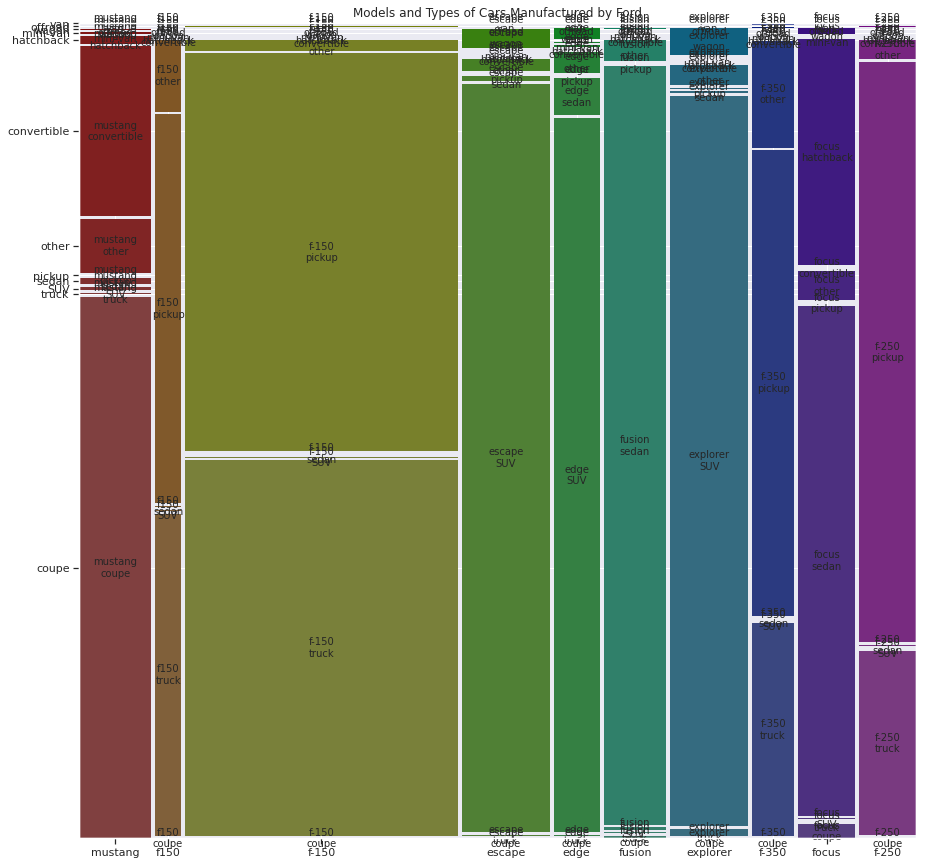

In [102]:
from statsmodels.graphics.mosaicplot import mosaic
sns.set(rc={'figure.figsize':(15,15)})
t = mosaic(ford, ['model','type'],title='Models and Types of Cars Manufactured by Ford')

In [105]:
from scipy.stats import chi2_contingency
ford_table = ford.pivot_table(index='model', columns='type', 
               values='id',aggfunc='count')
ford_table = ford_table.fillna(0)
chi2, p, dof, ex = chi2_contingency(ford_table)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  56005.287597204995
p-val =  0.0
degree of freedom =  99
Expected:


,0,1,2,3,4,5,6,7,8,9,10,11
0,263.694557,20.858485,68.217503,23.309072,0.284952,0.398933,35.163074,289.910139,135.580149,221.920598,0.740875,7.921665
1,506.402188,40.056884,131.005710,44.763020,0.547225,0.766115,67.527588,556.746905,260.369744,426.178975,1.422785,15.212860
2,448.626414,35.486766,116.059178,39.655977,0.484792,0.678709,59.823319,493.227268,230.663981,377.555923,1.260459,13.477215
3,1579.945197,124.975133,408.730149,139.658004,1.707311,2.390235,210.682124,1737.017769,812.338367,1329.653469,4.439007,47.463234
4,326.902241,25.858271,84.569264,28.896265,0.353255,0.494557,43.591676,359.401708,168.078762,275.115048,0.918463,9.820491
5,242.460726,19.178869,62.724333,21.432124,0.262006,0.366809,32.331590,266.565315,124.662647,204.050587,0.681217,7.283778
6,145.920864,11.542476,37.749573,12.898559,0.157684,0.220758,19.458218,160.427801,75.026094,122.804376,0.409979,4.383618
7,331.593436,26.229349,85.782871,29.310939,0.358324,0.501654,44.217236,364.559285,170.490768,279.063074,0.931644,9.961419
8,363.197279,28.729242,93.958751,32.104536,0.392476,0.549466,48.431537,399.305069,186.740075,305.660299,1.020438,10.910832
9,418.257097,33.084525,108.202668,36.971505,0.451974,0.632764,55.773639,459.838741,215.049413,351.997652,1.175133,12.564888
